In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys 
sys.path.append("../src/RGE")

%run ../startup.py

📊 Plot style: using ps.apply_standard_formatting
✅ startup.py loaded: numpy, scipy, matplotlib, and project modules are ready.
   Use new_figure() to create pre-formatted plots.


In [3]:
# Paso 1: crear Veff con la ruta explícita
veff_obj = veff.VeffRGE(vt_table_path="../VT_integralNumeric.dat")

# Paso 2: pasarlo explícitamente al solver
solver_ht = bs_ht.BounceSolverHighT(veff=veff_obj)

In [4]:
rge = rge.RGESolver()


## Exploring $\Lambda_S$

In [5]:
gD0, ms0 = 0.6, 0.0
lambdaS0 =1e-10
logT_span = (0,10)

In [6]:

# === Parámetros ===
gD0 = 0.6
lambdaS0 = 0.0
ms0 = 1e-10
logT_span = (0, 10)

# === Resolver RGE ===
sol = solve_ivp(
    rge.RGEs_logMu,
    logT_span,
    [gD0**2, lambdaS0, ms0],
    dense_output=True,
    max_step=0.1
)

# === Evaluar en puntos ===
mu_vals = np.logspace(-10, 4, 200)
logT_vals = np.log(mu_vals)
y_vals = sol.sol(logT_vals)   # shape = (3, len(mu_vals))

gD2_vals, lambdaS_vals, mS_vals = y_vals

In [7]:
colors = [
    '#313695', '#4575b4', '#74add1',        # Azules
                               # Violeta rosado

    '#a50026', '#d73027', '#f46d43', '#fdae61',  # Rojos a amarillos
    '#fdbb84',                              # Rosa claro
    '#5aae61',   '#1b7837',                 # Verdes intensos y medios (nuevos)
    '#444444',   
    '#1b7837',     '#5aae61',               # Verdes intensos y medios (nuevos)      
    '#fdbb84',                              # Rosa claro    
    '#fdae61','#f46d43', '#d73027',   '#a50026', # Rojos a amarillos
                                # Violeta rosado 
     '#74add1' ,  '#4575b4',  '#313695'    # Azules
]


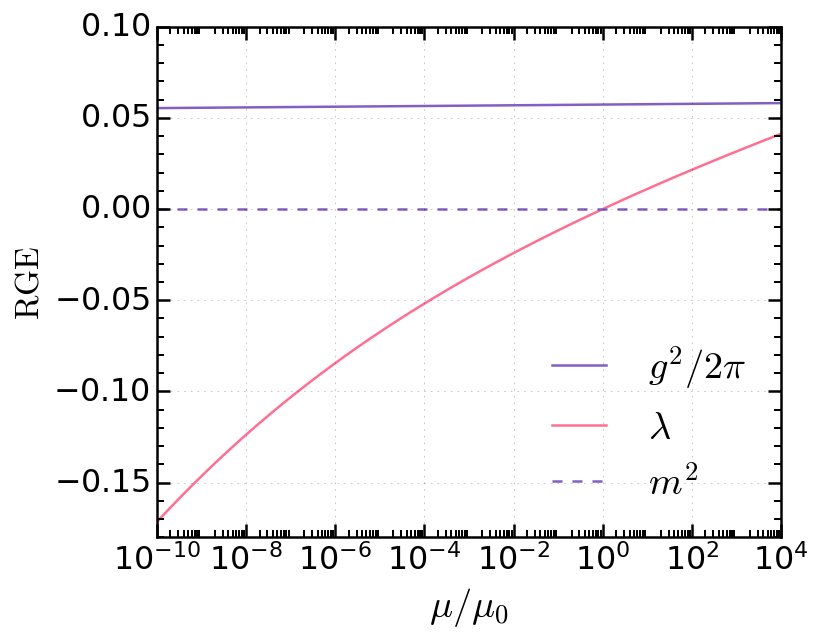

In [8]:
fig, ax = plt.subplots(figsize=(7, 5.5), dpi=120)
fig.patch.set_facecolor('white')



ax.plot(mu_vals, gD2_vals/2/np.pi, label=r"$g^2/2\pi$", color = '#845ec2', lw = 1.5)
ax.plot(mu_vals, lambdaS_vals, label=r"$\lambda$", color = '#ff6f91', lw = 1.5)
ax.plot(mu_vals, mS_vals, label=r"$m^2$", color = '#845ec2', lw = 1.5, ls='--')






ps.apply_standard_formatting(
    ax,
    xlog=True, ylog=False,
    ylim=[-0.18,0.1],
    xlabel=r'$\mu/\mu_0$',
    ylabel=r'$\rm RGE$',
)
ax.set_xticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2, 1e4])
plt.legend(loc = 'lower right', frameon = False, fontsize = 23)
plt.style.use('classic')
plt.tight_layout()
plt.grid('.', alpha = 0.25)
plt.savefig("../plots/RGE/RunningParam.pdf", dpi=300, bbox_inches="tight", facecolor="white")

## Exploring $\mu$ vs vev

In [9]:
# === Setup base (μ0 = 1) ===
mu0 = 1
ls0, mS0 = 0.0, 0.0   # condiciones iniciales fijas

# Lista de valores iniciales de gD0 que quieres explorar
gD0_list = [ 0.5, 0.6, 0.7, 0.8]

# Barrido en μ (relacionado a T)
mu_vals  = np.logspace(-3, 3, 400)
mu_ratios = mu_vals / mu0

# Diccionario para guardar resultados de cada gD0
results = {}

for gD0 in gD0_list:
    v_over_mu0 = []

    for mu in mu_vals:
        # 1) Corre RGE desde μ0 hasta μ con CI en μ0
        gD, _, _ = rge.run_params(mu=mu, gD0=gD0, lambdaS0=ls0, mS0=mS0)

        # 2) Minimiza Veff^0 a T=0 con escala = μ
        bracket = (1e-8*mu, 1e2*mu)
        v_mu = solver_ht.phi_min_Veff0(T=1, gD=gD, scale=mu, ls0=ls0)

        v_over_mu0.append(v_mu / mu0)

    results[gD0] = np.asarray(v_over_mu0)


In [10]:
np.exp(1/6.) * 1/0.8

np.float64(1.4767005160820572)

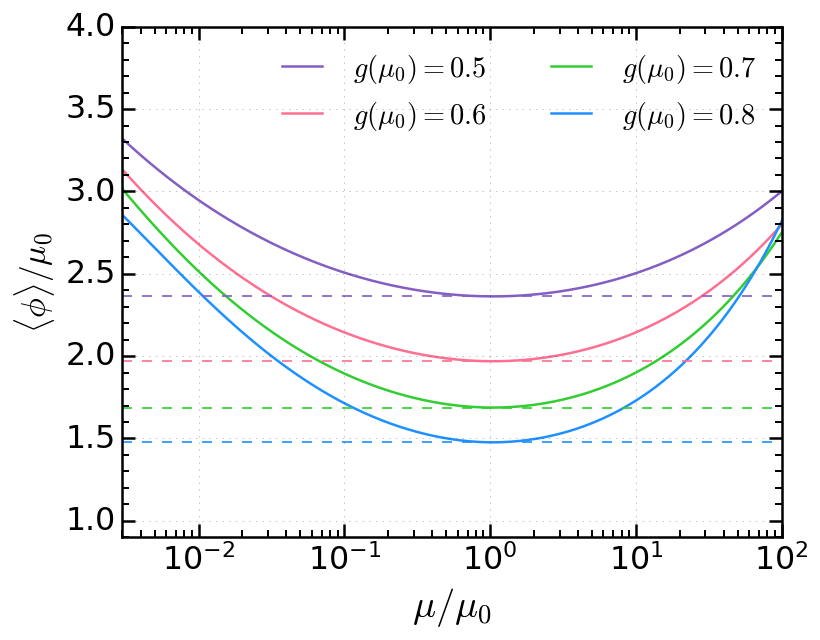

In [11]:
fig, ax = plt.subplots(figsize=(7, 5.5), dpi=120)
fig.patch.set_facecolor('white')

colors = ["#845ec2", "#ff6f91","limegreen",  "dodgerblue", "m"]

# loop con colores
for (gD0, vals), c in zip(results.items(), colors):
    ax.plot(mu_ratios, vals,
            color=c, lw=1.5,
            label=fr"$g(\mu_0)={gD0}$")

ax.axhline(1.968934021442743,color=colors[1], ls = '--')

ax.axhline(2.3627208257312917,color=colors[0], ls = '--')


ax.axhline(1.6876577326652085,color=colors[2], ls = '--')

ax.axhline(1.4767005160820572,color=colors[3], ls = '--')


ps.apply_standard_formatting(
    ax,
    xlog=True, ylog=False,
    xlabel=r'$\mu/\mu_0$',
    ylabel=r'$\langle\phi\rangle/\mu_0$',
    ylim=(0.9, 4),
    xlim=(3e-3, 1e2)
)

ax.legend(loc="best", frameon=False, fontsize=17, ncol=2)
plt.style.use('classic')
plt.tight_layout()
plt.grid('.', alpha = 0.25)
plt.savefig("../plots/RGE/RGE_vev_mu.pdf",
            dpi=300, bbox_inches="tight", facecolor="white")



In [12]:
# === Setup base (μ0 = 1) ===
gD0 = 0.6   # fijo
mS0 = 0.0

# Lista de λS(μ0) a explorar
ls0_list = [-0.02, -0.01, 0.0, 0.01, 0.02]

mu_vals  = np.logspace(-3, 3, 400)
mu_ratios = mu_vals 

# Diccionario con resultados para cada λS0
results_ls0 = {}

for ls0 in ls0_list:
    v_over_mu0 = []
    for mu in mu_vals:
        gD, _, _ = rge.run_params(mu=mu, gD0=gD0, lambdaS0=ls0, mS0=mS0)
        v_mu = solver_ht.phi_min_Veff0(T=1, gD=gD, scale=mu, ls0=ls0)
        v_over_mu0.append(v_mu )
    results_ls0[ls0] = np.asarray(v_over_mu0)




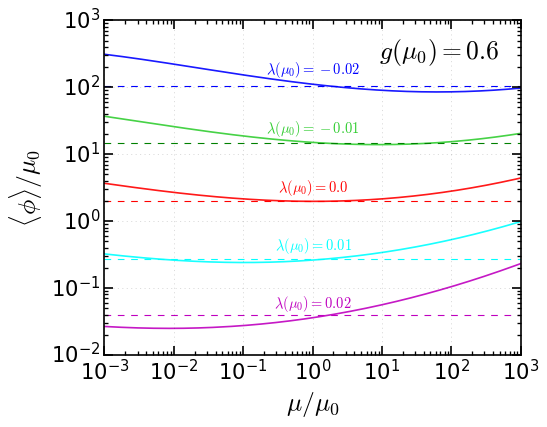

In [71]:
# === Plot ===
fig, ax = plt.subplots(figsize=(7, 5.5))
fig.patch.set_facecolor('white')

colors = ["blue", "limegreen", "red", "cyan", "m"]
offsets = [1.15, 1.15, 1.15, 1.15, 1.15]  # factor multiplicativo

for (ls0, vals, c, off) in zip(ls0_list, results_ls0.values(), colors, offsets):
    ax.plot(mu_ratios, vals, lw=1.5, color=c, alpha=0.9)

    mid_idx = len(mu_vals) // 2   # punto medio
    ax.text(mu_ratios[mid_idx], vals[mid_idx] * off,   # un poquito arriba
            fr"$\lambda(\mu_0)={ls0}$",
            color=c, fontsize=13,
            ha="center", va="bottom")


ax.text(
    0.95, 0.95,   # posición en coordenadas relativas al eje (0=izq/abajo, 1=der/arriba)
    r"$g(\mu_0)=0.6$",
    transform=ax.transAxes,   # usa coordenadas relativas al eje
    fontsize=23,
    ha="right", va="top"
)


ax.axhline(104.37354995248663,color='blue', ls = '--')
ax.axhline(14.504983582411375,color='green', ls = '--')
ax.axhline(1.9812568340241365,color='red', ls = '--')
ax.axhline(0.274331710060225,color='cyan', ls = '--')
ax.axhline(0.03949652912280534,color='m', ls = '--')

ps.apply_standard_formatting(
    ax,
    xlog=True, ylog=True,
    xlabel=r'$\mu/\mu_0$',
    ylabel=r'$\langle\phi\rangle/\mu_0$',
    # xlim = (1e-1,1e1)
)
plt.grid('.', alpha = 0.25)
plt.tight_layout()
plt.savefig("../plots/RGE/RGE_vev_mu_vev2.pdf", dpi=300, bbox_inches="tight", facecolor="white")


/var/folders/y8/6tlplz1d2w1dk6qd5rz9z4m80000gn/T/ipykernel_42771/3903217983.py:37: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0)


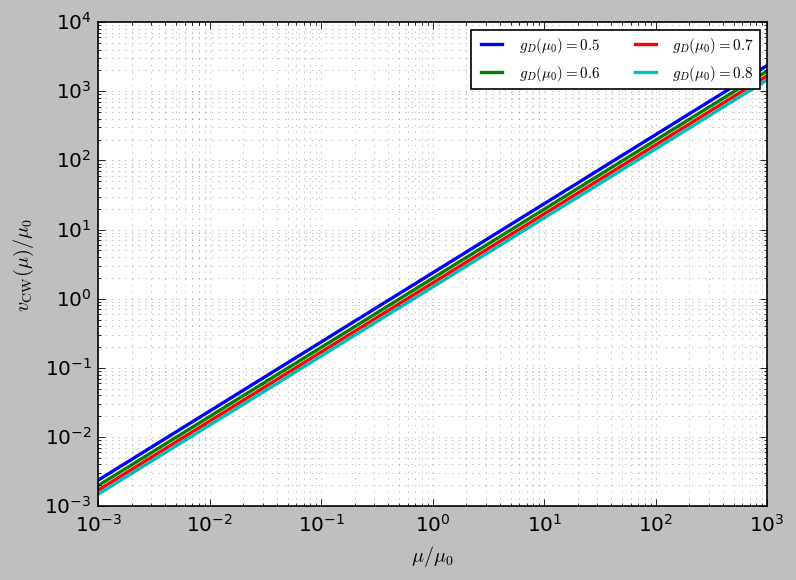

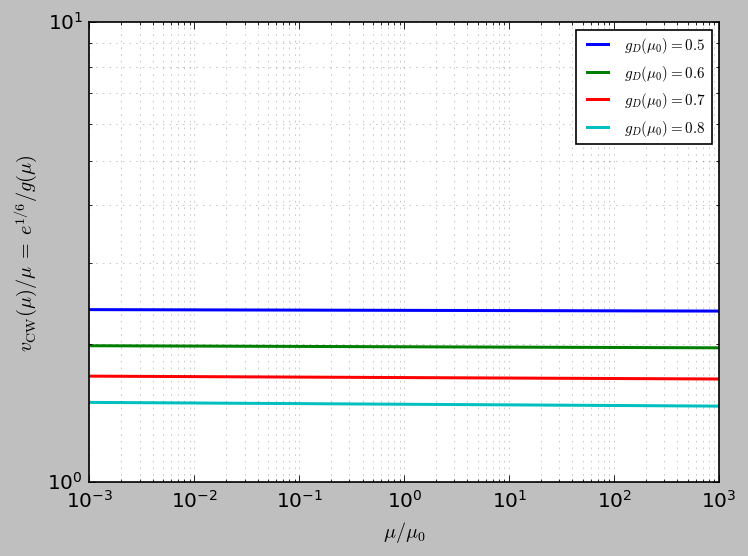

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------ Setup ------------------
mu0 = 1.0  # reference scale
gD0_list = [0.5, 0.6, 0.7, 0.8]  # initial values at μ0
ls0, mS0 = 0.0, 0.0              # CI: lambda(μ0)=0, m^2(μ0)=0

# Sweep μ (show in dimensionless axes μ/μ0)
mu_ratios = np.logspace(-3, 3, 500)
mu_vals   = mu0 * mu_ratios

# ------------------ Analytic CW: v_CW(μ) = e^{1/6} * μ / g(μ) ------------------
curves_v_over_mu0 = {}

for gD0 in gD0_list:
    v_over_mu0 = np.full_like(mu_vals, np.nan, dtype=float)
    for i, mu in enumerate(mu_vals):
        # Run RGE from μ0 to μ with boundary conditions at μ0
        gD, lamS, mS = rge.run_params(mu=mu, gD0=gD0, lambdaS0=ls0, mS0=mS0)

        # sanity filter: stay in perturbative region and avoid g→0
        if gD > 0 and (gD**2)/(4*np.pi) < 1.0:
            v_cw = np.exp(1.0/6.0) * (mu / gD)   # analytic CW-like expression
            v_over_mu0[i] = v_cw / mu0
    curves_v_over_mu0[gD0] = v_over_mu0

# ------------------ Plot v_CW(μ)/μ0 vs μ/μ0 ------------------
fig, ax = plt.subplots(figsize=(6.8, 5.0), dpi=120)
for gD0, y in curves_v_over_mu0.items():
    ax.plot(mu_ratios, y, lw=2.0, label=fr'$g_D(\mu_0)={gD0}$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\mu/\mu_0$')
ax.set_ylabel(r'$v_{\rm CW}(\mu)/\mu_0$')
ax.set_ylim(bottom=0)
ax.grid(True, which='both', alpha=0.25)
ax.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()

# ------------------ Optional: show the "compensation" explicitly ------------------
# Plot v_CW / μ = e^{1/6} / g(μ). If g runs slowly, this is fairly flat near μ~μ0.
fig, ax = plt.subplots(figsize=(6.4, 4.8), dpi=120)
for gD0 in gD0_list:
    y = []
    for mu in mu_vals:
        gD, _, _ = rge.run_params(mu=mu, gD0=gD0, lambdaS0=ls0, mS0=mS0)
        y.append((np.exp(1.0/6.0)/gD) if gD > 0 else np.nan)
    ax.plot(mu_ratios, y, lw=1.8, label=fr'$g_D(\mu_0)={gD0}$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\mu/\mu_0$')
ax.set_ylabel(r'$v_{\rm CW}(\mu)/\mu \;=\; e^{1/6}/g(\mu)$')
ax.grid(True, which='both', alpha=0.25)
ax.legend(fontsize=9)
plt.tight_layout()
plt.show()
